# Communicate Data Finding - Exploration with Ford Gobike System Data
## by Sibo Li

## Investigation Overview

> Investigate the trip duration distribution and the how features (season, user type and purpose) affect it.

## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system convering the greater San Francisco Bay Area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob 

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Get the path to the datasets
curDir = os.getcwd()
path = curDir+'/fordgobike datasets/' 

all_files = glob.glob(path + "/*.csv") #read all files with csv extension

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) #header=0 so that after reading csv first row can be assigned as the column names.
    li.append(df)

df_bike = pd.concat(li, axis=0, ignore_index=True)
df_bike.original = df_bike.copy()


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The trip duration distribution.

> The distribution is right skewed. There's a long tail in the distribution. There are a lot of people use bike for a short trip, few for a longer trip. When plotted in log-scale, the trip duration distribution is nearly unimodal. We can see that the average trip duration is around 600s. Most people use bike for a short trip.

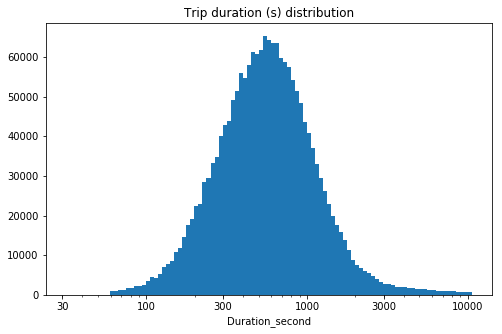

In [3]:
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(10000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
ticks =  [30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Duration_second');
plt.title('Trip duration (s) distribution')
plt.show()

## The effect of season on the trip duration.

> Spring and Summer have longer trip duration. However, there is no significant difference between each season, possibly because that Bay Area's weather does not change much. I won't be surprised to see a bigger differnece in trip duration in Chicago.

In [4]:
df_bike['month'] = pd.DatetimeIndex(df_bike['start_time']).month


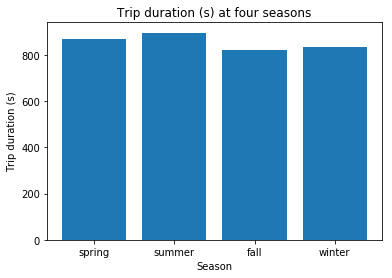

In [10]:
Spring_duration = df_bike.query('month in ["3","4","5"]').duration_sec.mean()
Summer_duration = df_bike.query('month in ["6","7","8"]').duration_sec.mean()
Fall_duration = df_bike.query('month in ["9","10","11"]').duration_sec.mean()
Winter_duration = df_bike.query('month in ["12","1","2"]').duration_sec.mean()

plt.bar(['spring','summer','fall','winter'],[Spring_duration,Summer_duration,Fall_duration,Winter_duration])
plt.title('Trip duration (s) at four seasons')
plt.xlabel('Season')
plt.ylabel('Trip duration (s)');

## The effect of user type on the trip duration.

> The effect of user type on the trip duration.

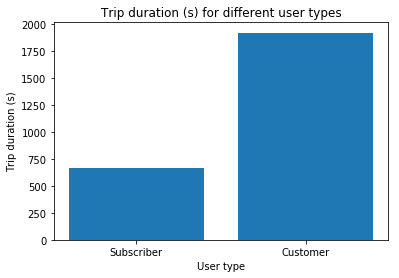

In [9]:
Subscriber_dur = df_bike.query('user_type == "Subscriber"').duration_sec.mean()
Customer_dur = df_bike.query('user_type == "Customer"').duration_sec.mean()

plt.bar(['Subscriber','Customer'], [Subscriber_dur, Customer_dur])
plt.title('Trip duration (s) for different user types')
plt.xlabel('User type')
plt.ylabel('Trip duration (s)');

## The combination effect of season and user type on the trip duration.

> For the user_type, firstly we can observe that there are more customers than subscribers. Also, customers tend to have a longer trip duration than subscribers.

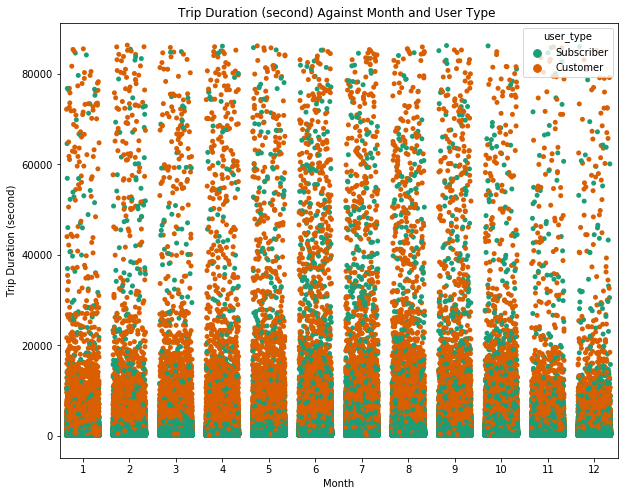

In [7]:
plt.figure(figsize=[10,8])
sb.stripplot(data=df_bike, x='month',y='duration_sec',hue='user_type',jitter=0.35, dodge=False,palette='Dark2')
plt.title('Trip Duration (second) Against Month and User Type ')
plt.xlabel('Month')
plt.ylabel('Trip Duration (second)');

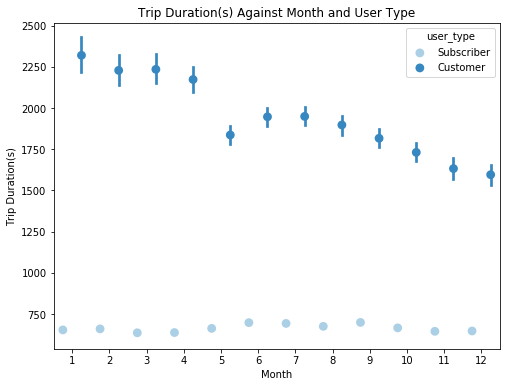

In [8]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_bike, x = 'month', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.5)
plt.title('Trip Duration(s) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(s)');
ax.set_yticklabels([],minor = True)
plt.show();

## The combination effect of season and bike share purpose on the trip duration.

> For the bike_share_for_all_trip, it does make an impact on the trip duration. When the bike_share_for_all_trip is no, the trip duration is longer.

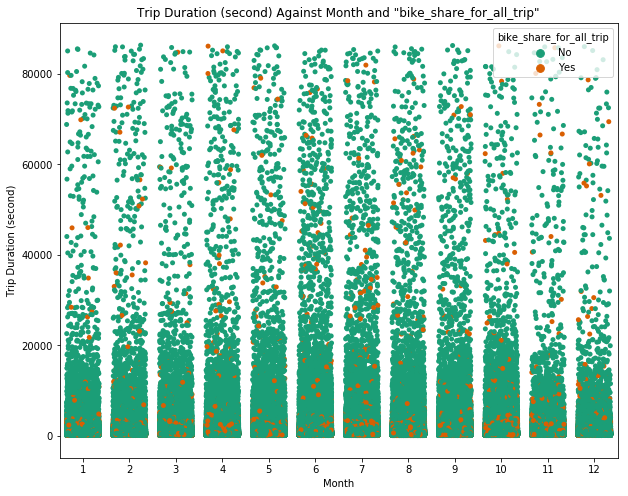

In [8]:
plt.figure(figsize=[10,8])
sb.stripplot(data=df_bike, x='month',y='duration_sec',hue='bike_share_for_all_trip',jitter=0.35, dodge=False,palette='Dark2')
plt.title('Trip Duration (second) Against Month and "bike_share_for_all_trip"')
plt.xlabel('Month')
plt.ylabel('Trip Duration (second)');

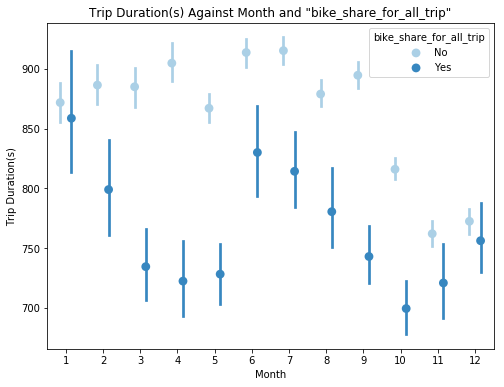

In [9]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_bike, x = 'month', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.3)
plt.title('Trip Duration(s) Against Month and "bike_share_for_all_trip"')
plt.xlabel('Month')
plt.ylabel('Trip Duration(s)');
ax.set_yticklabels([],minor = True)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!